Group: Brian, Frank and Olivia

Topic: Real Estate Data

### Import realtor-data.csv from Google Drive

In [ ]:
# mount google drive to colab
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# use pandas to read csv 
import pandas as pd
path = "/content/drive/MyDrive/realtor-data.csv"
real_estate_rawdata = pd.read_csv(path)
real_estate_rawdata.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [ ]:
real_estate_rawdata.shape

(923159, 12)

In [ ]:
real_estate_rawdata['state'].value_counts()

New Jersey        233722
New York          211778
Massachusetts     175248
Connecticut        91644
New Hampshire      51394
Vermont            46460
Maine              36650
Rhode Island       29596
Puerto Rico        24679
Pennsylvania       17148
Virgin Islands      2573
Delaware            2135
Georgia               50
Virginia              31
South Carolina        25
Tennessee             20
Wyoming                3
West Virginia          3
Name: state, dtype: int64

# Cleaning Raw Data csv

*   Remove duplicate
*   Check data types 
*   Removing States with little to no data
*   Replace missing values

# Eliminate duplicates






In [ ]:
# drop datafram duplicates, subet by full_address
real_estate_data = real_estate_rawdata.drop_duplicates(subset= 'full_address', keep='first', ignore_index = True)
real_estate_data.shape

(112232, 12)

In [ ]:
real_estate_data['state'].value_counts()

New Jersey        32299
New York          27952
Connecticut       13776
Massachusetts     10110
Pennsylvania       9001
Maine              4986
New Hampshire      3532
Rhode Island       3409
Puerto Rico        2632
Vermont            2500
Delaware           1277
Virgin Islands      742
Virginia              7
Georgia               5
Wyoming               1
South Carolina        1
West Virginia         1
Tennessee             1
Name: state, dtype: int64

# Check Data Types

In [ ]:
# checking data types
real_estate_data.dtypes

status           object
price           float64
bed             float64
bath            float64
acre_lot        float64
full_address     object
street           object
city             object
state            object
zip_code        float64
house_size      float64
sold_date        object
dtype: object

# Missing Values

In [ ]:
# `True` means there are missing values in the data
real_estate_data.isna().any()

status          False
price            True
bed              True
bath             True
acre_lot         True
full_address    False
street           True
city             True
state           False
zip_code         True
house_size       True
sold_date        True
dtype: bool

In [ ]:
# total number of values missing in each column
real_estate_data.isna().sum()

status              0
price               5
bed             17094
bath            15721
acre_lot        30451
full_address        0
street            232
city               23
state               0
zip_code           33
house_size      35756
sold_date       53024
dtype: int64

In [ ]:
# percent of values missing in each column
(real_estate_data.isna().sum()/real_estate_data.shape[0]).round(4) * 100

status           0.00
price            0.00
bed             15.23
bath            14.01
acre_lot        27.13
full_address     0.00
street           0.21
city             0.02
state            0.00
zip_code         0.03
house_size      31.86
sold_date       47.24
dtype: float64



*   Not worried about: 'sold_date'




In [ ]:
# try to replace missing values with mean
# creating copy of df
real_estate_data_copy = real_estate_data.copy()
# correct missing values 
real_estate_data_copy['price'] = real_estate_data_copy['price'].fillna(real_estate_data_copy['price'].mean())
real_estate_data_copy['house_size'] = real_estate_data_copy['house_size'].fillna(real_estate_data_copy['house_size'].mean())
real_estate_data_copy['bed'] = real_estate_data_copy['bed'].fillna(real_estate_data_copy['bed'].mean())
real_estate_data_copy['bath'] = real_estate_data_copy['bath'].fillna(real_estate_data_copy['bath'].mean())
real_estate_data_copy['acre_lot'] = real_estate_data_copy['acre_lot'].fillna(real_estate_data_copy['acre_lot'].mean())

real_estate_data_copy.isna().sum()


status              0
price               0
bed                 0
bath                0
acre_lot            0
full_address        0
street            232
city               23
state               0
zip_code           33
house_size          0
sold_date       53024
dtype: int64

# Remove states with little to no data

_Georgia, South Carolina, Tennessee, Virginia, West Virginia, Wyoming_ HAVE TO GO

In [ ]:
real_estate_data_copy.drop(real_estate_data_copy.index[real_estate_data_copy['state'] == 'Georgia'], inplace = True)
real_estate_data_copy.drop(real_estate_data_copy.index[real_estate_data_copy['state'] == 'South Carolina'], inplace = True)
real_estate_data_copy.drop(real_estate_data_copy.index[real_estate_data_copy['state'] == 'Tennessee'], inplace = True)
real_estate_data_copy.drop(real_estate_data_copy.index[real_estate_data_copy['state'] == 'Virginia'], inplace = True)
real_estate_data_copy.drop(real_estate_data_copy.index[real_estate_data_copy['state'] == 'West Virginia'], inplace = True)
real_estate_data_copy.drop(real_estate_data_copy.index[real_estate_data_copy['state'] == 'Wyoming'], inplace = True)

# Also removing VI and PR, bc it is not in our story

In [ ]:
real_estate_data_copy.drop(real_estate_data_copy.index[real_estate_data_copy['state'] == 'Virgin Islands'], inplace = True)
real_estate_data_copy.drop(real_estate_data_copy.index[real_estate_data_copy['state'] == 'Puerto Rico'], inplace = True)

# Removing Outliers

In [ ]:
# Price outliers 
import numpy as np
q1 =  np.quantile(real_estate_data_copy['price'], 0.25)
q3 =  np.quantile(real_estate_data_copy['price'], 0.75)

iqr = q3 - q1

bound_low = q1 - 1.5 * iqr
bound_up = q3 + 1.5 * iqr

real_estate_data_copy['price'] =  np.where(real_estate_data_copy['price'] > bound_up, bound_up, real_estate_data_copy['price'])
real_estate_data_copy['price'] =  np.where(real_estate_data_copy['price']< bound_low, bound_low, real_estate_data_copy['price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f29b2d5a760>,
 'caps': [<matplotlib.lines.Line2D at 0x7f29b2d5ae20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f29b2d5a400>],
 'medians': [<matplotlib.lines.Line2D at 0x7f29b2cf2520>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f29b2cf2820>],
 'means': []}

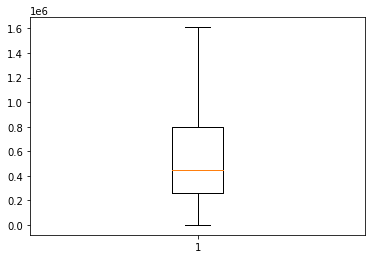

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(real_estate_data_copy['price'])

In [ ]:
# Square footage outliers 
q1 =  np.quantile(real_estate_data_copy['house_size'], 0.25)
q3 =  np.quantile(real_estate_data_copy['house_size'], 0.75)

iqr = q3 - q1

bound_low = q1 - 1.5 * iqr
bound_up = q3 + 1.5 * iqr

real_estate_data_copy['house_size'] =  np.where(real_estate_data_copy['house_size'] > bound_up, bound_up, real_estate_data_copy['house_size'])
real_estate_data_copy['house_size'] =  np.where(real_estate_data_copy['house_size']< bound_low, bound_low, real_estate_data_copy['house_size'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f29b282a970>,
 'caps': [<matplotlib.lines.Line2D at 0x7f29b283c430>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f29b282a610>],
 'medians': [<matplotlib.lines.Line2D at 0x7f29b283c1f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f29b283ca00>],
 'means': []}

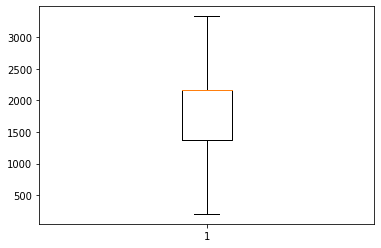

In [ ]:
plt.boxplot(real_estate_data_copy['house_size'])

# Descriptive Statistics

In [ ]:
import numpy as np

In [ ]:
real_estate_data_copy.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,price,bed,bath,acre_lot,zip_code,house_size
count,108842.00000,108842.00000,108842.00000,108842.00000,108835.00000,108842.00000
mean,609308.02434,3.29932,2.51784,17.02448,8485.33975,1948.62946
std,473384.34737,1.71623,1.61009,799.86387,4448.83256,719.32877
min,0.00000,1.00000,1.00000,0.00000,604.00000,202.02293
25%,259888.00000,2.00000,2.00000,0.15000,6110.50000,1376.00000
50%,450000.00000,3.00000,2.00000,0.73000,8037.00000,2158.65138
75%,800000.00000,4.00000,3.00000,17.82638,10308.00000,2158.65138
max,1610168.00000,123.00000,198.00000,100000.00000,99999.00000,3332.62845


In [ ]:
# average price of a home by 'bed' count
real_estate_data_copy.groupby('bed')['price'].agg(np.mean).round(2) 

bed
1.000000       558414.08
2.000000       570817.09
3.000000       544415.72
3.306597       351855.35
4.000000       717245.69
5.000000       970301.98
6.000000       948933.97
7.000000      1035892.96
8.000000       946393.03
9.000000       872472.97
10.000000      991216.21
11.000000     1226004.78
12.000000     1107537.61
13.000000     1095744.14
14.000000     1245984.89
15.000000     1252038.86
16.000000     1318188.29
17.000000     1373738.50
18.000000     1247755.30
19.000000     1407625.88
20.000000     1413824.00
21.000000     1406584.00
22.000000     1610168.00
23.000000     1350000.00
24.000000     1491806.67
25.000000      729000.00
27.000000     1405084.00
28.000000     1516100.80
29.000000     1610168.00
30.000000      937500.00
31.000000      953387.67
32.000000     1610168.00
33.000000     1610168.00
36.000000     1610168.00
40.000000     1610168.00
42.000000     1610168.00
46.000000     1610168.00
47.000000     1399000.00
49.000000     1610168.00
60.000000     1610168

# New Features

In [ ]:
#calculating the price/sqft by house size
real_estate_data_copy['price_sqft'] = real_estate_data_copy['price']/real_estate_data_copy['house_size']

real_estate_data_copy['price_sqft']


3363      266.272189
3364       11.581305
3365      190.470852
3366      169.467787
3367      180.801688
             ...    
112227    739.287420
112228    428.964758
112229    714.926042
112230    483.152570
112231    483.152570
Name: price_sqft, Length: 108842, dtype: float64

In [ ]:
#calculating the bed/bath count by house
real_estate_data_copy['bed_bath_ratio'] = real_estate_data_copy['bed']/real_estate_data_copy['bath']

real_estate_data_copy['bed_bath_ratio']

3363      2.000000
3364      1.312264
3365      1.000000
3366      1.000000
3367      1.000000
            ...   
112227    1.333333
112228    1.333333
112229    1.250000
112230    0.800000
112231    1.250000
Name: bed_bath_ratio, Length: 108842, dtype: float64

In [ ]:
#calculating the bed/bath count by house
real_estate_data_copy['price_acre'] = real_estate_data_copy['price']/real_estate_data_copy['acre_lot']

real_estate_data_copy['price_acre']

3363      5.294118e+05
3364      7.331378e+03
3365      9.530820e+03
3366      1.357539e+04
3367      1.682619e+04
              ...     
112227    9.471576e+06
112228    1.320339e+06
112229    9.968750e+06
112230    1.150120e+07
112231    3.220336e+06
Name: price_acre, Length: 108842, dtype: float64

# Comparing states

In [ ]:
# average price per house square footage in each state
real_estate_data_copy.groupby('state')['price_sqft'].agg(np.mean).round(2).sort_values()

state
Maine            164.68
Delaware         178.83
Vermont          188.56
New Hampshire    213.43
Pennsylvania     223.67
Connecticut      239.82
New Jersey       267.65
Rhode Island     275.24
Massachusetts    390.86
New York         560.55
Name: price_sqft, dtype: float64

In [ ]:
# highest house square footage per state
real_estate_data_copy.groupby('state')['price_sqft'].agg(np.max).round(2).sort_values()

state
Vermont          1369.19
Pennsylvania     1397.72
Delaware         1401.36
Rhode Island     2008.93
New Hampshire    2012.71
New Jersey       2232.14
Maine            2433.04
Massachusetts    3220.34
New York         3628.12
Connecticut      4663.33
Name: price_sqft, dtype: float64

In [ ]:
# average house square footage per state
real_estate_data_copy.groupby('state')['house_size'].agg(np.mean).round(2).sort_values()

state
Pennsylvania     1742.64
New York         1848.94
Rhode Island     1932.63
Connecticut      1987.15
Massachusetts    1987.78
Maine            1988.44
Delaware         1990.83
New Jersey       2035.42
New Hampshire    2050.28
Vermont          2090.23
Name: house_size, dtype: float64

In [ ]:
# average number of bedrooms per state
real_estate_data_copy.groupby('state')['bed'].agg(np.mean).round(2).sort_values()

state
New York         2.97
New Hampshire    3.20
Pennsylvania     3.24
Delaware         3.26
Maine            3.34
Vermont          3.42
New Jersey       3.45
Connecticut      3.46
Rhode Island     3.48
Massachusetts    3.49
Name: bed, dtype: float64

In [ ]:
# average number of bathrooms per state
real_estate_data_copy.groupby('state')['bath'].agg(np.mean).round(2).sort_values()

state
Pennsylvania     2.31
New York         2.37
Rhode Island     2.41
Maine            2.42
Delaware         2.43
New Hampshire    2.50
New Jersey       2.60
Vermont          2.63
Massachusetts    2.67
Connecticut      2.69
Name: bath, dtype: float64

In [ ]:
# average acreage of states
real_estate_data_copy.groupby('state')['acre_lot'].agg(np.mean).round(2).sort_values()

state
Pennsylvania      3.05
Delaware          3.84
Massachusetts     7.60
Rhode Island      9.71
New Hampshire    11.57
New York         16.02
Maine            17.96
Vermont          18.30
New Jersey       20.88
Connecticut      29.94
Name: acre_lot, dtype: float64

In [ ]:
# average bed-to-bath ratio by state
real_estate_data_copy.groupby('state')['bed_bath_ratio'].agg(np.mean).round(2).sort_values()

state
New Hampshire    1.40
New York         1.41
Connecticut      1.44
Vermont          1.44
Massachusetts    1.45
New Jersey       1.48
Maine            1.50
Delaware         1.54
Rhode Island     1.60
Pennsylvania     1.64
Name: bed_bath_ratio, dtype: float64

# Comparing Cities

In [ ]:
# seeing if cities ranked matched the states ranked
real_estate_data_copy.groupby('city')['price_sqft'].agg(np.mean).round(2).sort_values()
pd.pivot_table(real_estate_data_copy, values='price_sqft', index=['state','city'], columns=None, aggfunc='mean').sort_values(by='price_sqft')[:30]

price_sqft
state         city                             
New Jersey    Port Murray              4.500164
Maine         Orient                   5.790652
Pennsylvania  Lehman                   6.242323
Maine         Macwahoc Plt             9.033418
              Maine                    9.265044
              Ta R2 Wels              11.118053
New York      Beekmantown             11.303354
              Tupper Lake             11.581305
Maine         Carmel                  11.581305
              Orneville Township      12.391996
              Oakfield                12.396629
              Sangerville             12.924736
Massachusetts Rowe                    12.971062
Maine         Cambridge               12.971062
              Mercer                  13.897566
              Somerville              15.055696
              Brookton                15.153181
              Atkinson                16.213364
              Waite                   18.483763
              Silver Ridge Township   18.483763
New York      Saratoga                19.688218
Massachusetts Middlefield             20.074262
Maine         Castle Hill             20.733458
              Great Pond              21.309601
              Wyman Township          21.772853
              Edinburg                22.699358
              Mariaville              22.754948
New Jersey    Buena Vista             23.162610
Maine         Hanover                 25.015619
Massachusetts Petersham               25.478871

In [ ]:
# average house square footage per state
real_estate_data_copy.groupby('state')['price_sqft'].agg(np.mean).round(2).sort_values().index.tolist()


['Maine',
 'Delaware',
 'Vermont',
 'New Hampshire',
 'Pennsylvania',
 'Connecticut',
 'New Jersey',
 'Rhode Island',
 'Massachusetts',
 'New York']

In [ ]:
real_estate_data_copy['state'].value_counts()

New Jersey       32299
New York         27952
Connecticut      13776
Massachusetts    10110
Pennsylvania      9001
Maine             4986
New Hampshire     3532
Rhode Island      3409
Vermont           2500
Delaware          1277
Name: state, dtype: int64

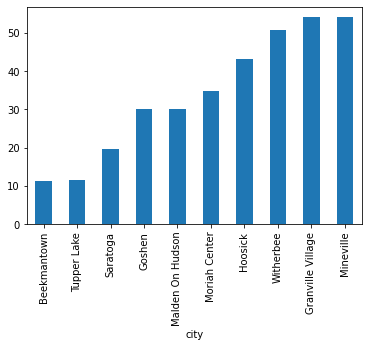

In [ ]:
# comparing city price per sqft in the top five price per sqft states 
##real_estate_data_copy.pivot_table(index=['state','city'], values=['price_sqft'], aggfunc='mean').round(2)
def city_barchart(state,feature):
  state_data = real_estate_data_copy[real_estate_data_copy['state'] == state]
  if feature == 'price_sqft':
    return state_data.groupby('city')[feature].agg(np.mean).round(2).sort_values(ascending = True)[:10].plot(kind='bar');
  else:
    return state_data.groupby('city')[feature].agg(np.mean).round(2).sort_values(ascending = False)[:10].plot(kind='bar');

city_barchart('New York','price_sqft')

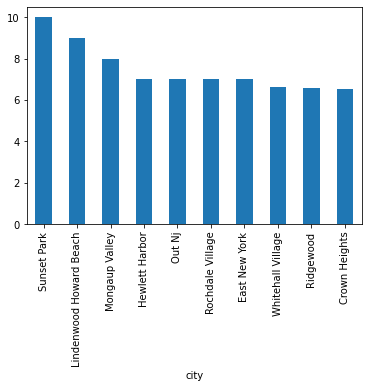

In [ ]:
# comparing city beds in the top five bed states 
city_barchart('New York','bed')

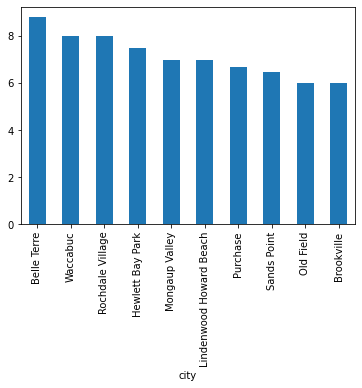

In [ ]:
# comparing city baths in the top five bath states 
city_barchart('New York','bath')

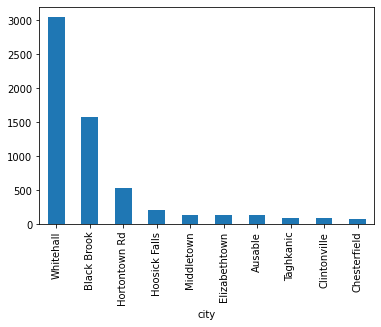

In [ ]:
# comparing city acres in the top five acres states 
city_barchart('New York','acre_lot')

# 12/8

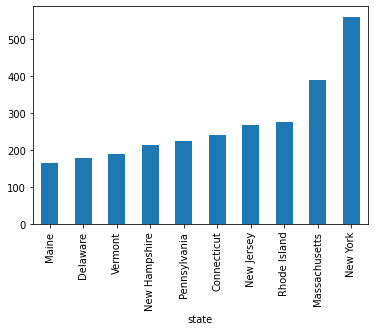

In [ ]:
real_estate_data_copy.groupby('state')['price_sqft'].agg(np.mean).round(2).sort_values().plot(kind='bar');

In [ ]:
import pandas as pd
import re
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

def best_match(x):
    if len(x) == 2: # Try another way for 2-letter codes
        for a,n in states.items():
            if len(n.split()) == 2:
                if "".join([c[0] for c in n.split()]).lower() == x.lower():
                    return a.lower()
    new_rx = re.compile(r"\w*".join([ch for ch in x]), re.I)
    for a,n in states.items():
        if new_rx.match(n):
            return a.lower()
        
real_estate_data_copy['state_abbrev'] = real_estate_data_copy['state'].apply(lambda x: best_match(x)).str.upper()
real_estate_data_copy.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,price_sqft,bed_bath_ratio,price_acre,state_abbrev
3363,for_sale,180000.0,2.000000,1.000000,0.340000,"23 Moore St, Agawam, MA, 01001",23 Moore St,Agawam,Massachusetts,1001.0,676.000000,NaN,266.272189,2.000000,529411.764706,MA
3364,for_sale,25000.0,3.306597,2.519765,3.410000,"Leonard St, Agawam, MA, 01001",Leonard St,Agawam,Massachusetts,1001.0,2158.651381,NaN,11.581305,1.312264,7331.378299,MA
3365,for_sale,169900.0,2.000000,2.000000,17.826378,"420 Main St Apt 42, Agawam, MA, 01001",420 Main St Apt 42,Agawam,Massachusetts,1001.0,892.000000,2019-04-30,190.470852,1.000000,9530.819866,MA
3366,for_sale,242000.0,2.000000,2.000000,17.826378,"2A Mansion Woods Dr Unit 2A, Agawam, MA, 01001",2A Mansion Woods Dr Unit 2A,Agawam,Massachusetts,1001.0,1428.000000,NaN,169.467787,1.000000,13575.387920,MA
3367,for_sale,299950.0,2.000000,2.000000,17.826378,"19 Castle Hill Rd Unit C, Agawam, MA, 01001",19 Castle Hill Rd Unit C,Agawam,Massachusetts,1001.0,1659.000000,NaN,180.801688,1.000000,16826.188456,MA


In [ ]:
import pandas as pd
import numpy as np

data = real_estate_data_copy.groupby('state_abbrev')['price_sqft'].agg(np.mean)
average_pricesqft_state = pd.DataFrame(data).reset_index()
average_pricesqft_state

,state_abbrev,price_sqft
0,CT,239.815655
1,DE,178.830845
2,MA,390.855834
3,ME,164.683684
4,NH,213.425124
5,NJ,267.653623
6,NY,560.550247
7,PA,223.665107
8,RI,275.236422
9,VT,188.557076


In [ ]:
import plotly.express as px
fig = px.choropleth(average_pricesqft_state,
                    locations="state_abbrev", 
                    locationmode="USA-states", 
                    scope="usa",
                    color="price_sqft",
                    color_continuous_scale="Viridis_r", 
    
                    )
fig.update_geos(fitbounds="locations")
fig.show()

In [ ]:
# cities of certain state
nj_cities = real_estate_data_copy[real_estate_data_copy['state_abbrev'] == 'NJ']
nj_df = nj_cities.groupby('city')['price_sqft'].agg(np.mean).reset_index()
nj_df

,city,price_sqft
0,Aberdeen,219.081974
1,Absecon,140.753885
2,Absecon Highlands,41.229446
3,Adelphia,157.042496
4,Alexandria Township,146.448452
...,...,...
754,Woodlynne,109.058517
755,Woodstown,130.059321
756,Woolwich Township,154.509774
757,Wrightstown,142.234469


# Find a home function (state)

In [ ]:
# place with lowest average price with given bedroom number
n = 3

rlst_df = real_estate_data_copy.loc[real_estate_data_copy['bed'] == n].sort_values(by= 'price',ascending=True)
top100_info = rlst_df.iloc[0:25]
top100_info['state'].value_counts()

New Jersey       6
New York         5
Maine            4
Delaware         4
Pennsylvania     3
Massachusetts    2
Vermont          1
Name: state, dtype: int64

In [ ]:
# States in the top ten of price per sqft, number of bedroom, number of bathrooms 
a = real_estate_data_copy.groupby('state')['price_sqft'].agg(np.mean).round(2).sort_values(ascending = True)[:8].index.tolist()
b = real_estate_data_copy.groupby('state')['bed'].agg(np.mean).round(2).sort_values(ascending = False)[:8].index.tolist()
c = real_estate_data_copy.groupby('state')['bath'].agg(np.mean).round(2).sort_values(ascending = False)[:8].index.tolist()
common_elements = list(set.intersection(*map(set, [ a, b, c])))
common_elements


['Vermont', 'Maine', 'Delaware', 'Connecticut', 'New Jersey', 'Rhode Island']

# Find a home function (city)

In [ ]:
real_estate_data_copy.groupby('state')['city'].nunique().sort_values()

state
Delaware          18
Rhode Island      39
Pennsylvania     147
Connecticut      176
New Hampshire    232
Vermont          241
Massachusetts    412
New York         475
Maine            523
New Jersey       759
Name: city, dtype: int64

In [ ]:
# best price per sqft, bed to bath ratio, and acreage in given state
def city_finder(state):
  state_data = real_estate_data_copy[real_estate_data_copy['state_abbrev'] == state]
  a = state_data.groupby('city')['price_sqft'].agg(np.mean).round(2).sort_values(ascending = True)[:100].index.tolist()
  b = state_data.groupby('city')['bed'].agg(np.mean).round(2).sort_values(ascending = False)[:100].index.tolist()
  c = state_data.groupby('city')['bath'].agg(np.mean).round(2).sort_values(ascending = False)[:100].index.tolist()
  common_elements = list(set.intersection(*map(set, [ a, b, c])))
  return common_elements

city_finder('NJ')

[]

In [ ]:
state_data = real_estate_data_copy[real_estate_data_copy['state_abbrev'] == 'NJ']
a = state_data.groupby('city')['price_sqft'].agg(np.mean).round(2).sort_values(ascending = True)[:10].index.tolist()
b = state_data.groupby('city')['bed'].agg(np.mean).round(2).sort_values(ascending = False)[:10].index.tolist()
c = state_data.groupby('city')['bath'].agg(np.mean).round(2).sort_values(ascending = False)[:10].index.tolist()
a

['Port Murray',
 'Buena Vista',
 'Devonshire',
 'Elk Township',
 'Berkeley Township',
 'Rancocas',
 'Upper Deerfield Township',
 'Absecon Highlands',
 'New Jersey',
 'Annandale']

# Find a home with a budget

In [ ]:

# States in the top ten of price per sqft, number of bedroom, number of bathrooms 
def findhome_onbudget(state, budget):
  state_data = real_estate_data_copy[real_estate_data_copy['state_abbrev'] == state]
  within_budget = state_data[state_data['price'] <= budget]
  a = within_budget.groupby('city')['price_sqft'].agg(np.mean).round(2).sort_values(ascending = True)[:100].index.tolist()
  b = within_budget.groupby('city')['bed'].agg(np.mean).round(2).sort_values(ascending = False)[:100].index.tolist()
  c = within_budget.groupby('city')['bath'].agg(np.mean).round(2).sort_values(ascending = False)[:100].index.tolist()
  common_elements = list(set.intersection(*map(set, [ a, b, c])))
  if len(common_elements) == 0:
    return 'Nothing found'
  else:
    return common_elements

findhome_onbudget('NY',1000000)

['Morrisonville',
 'White Lake',
 'Essex',
 'Milan',
 'Chatham Village',
 'Whitehall Village',
 'Orangeburg']

# Add the final notebook

DATA DICTIONARY

| Feature Name | Description | Data Types |
| ------------ | ---------- | --- |
| status | _For sale or not_ | string |
| price | _Selling price in dollars_ | float |
| bed | _Number of bedrooms_ | float | 
| bath | _Number of bathrooms_ | float |
| acre_lot | _Acreage of property_ | float |
| address | _Full address of property_ | string |
| street | _Street of property_ | string |
| city | _City of property_ | string |
| state | _State of property_ | string |
| zip_code | _Zipcode of property_ | float |
| house_size | _Square footage of property_ | float | 
|sold_date | _Date of property sale_ | string |

In [ ]:
sorted(real_estate_data_copy['state'].unique())

['Connecticut',
 'Delaware',
 'Maine',
 'Massachusetts',
 'New Hampshire',
 'New Jersey',
 'New York',
 'Pennsylvania',
 'Rhode Island',
 'Vermont']

STATE DICTIONARY

| State Abbreviation | State | Removed | 
| ------------ | ---------- | -------- | 
| Connecticut | CT | |
| Delaware | DE | |
| Georgia | GA | _Removed due to lack of data_ |
| Maine | ME | |
| Massachusetts | MA | |
| New Hampshire | NH | |
| New Jersey | NJ | |
| New York | NY | |
| Pennsylvania |PA | |
| Puerto Rico | PR | _Removed due irrelevance_ |
| Rhode Island |RI | |
| South Carolina | SC | _Removed due to lack of data_ |
| Tennessee | TN | _Removed due to lack of data_ |
| Vermont | VT | |
| Virgin Islands | VI | _Removed due irrelevance_ |
| Virginia | VA | _Removed due to lack of data_ |
| West Virginia | WV | _Removed due to lack of data_ |
| Wyoming | WY | _Removed due to lack of data_ |

What is best state/city by price per sqft?

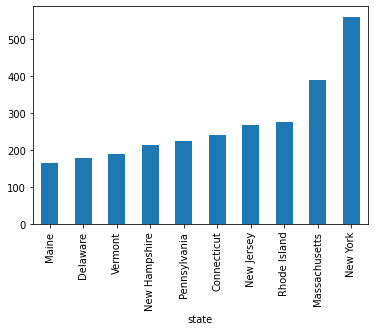

In [ ]:
# Comparing states, sub in whichever category 
real_estate_data_copy.groupby('state')['price_sqft'].agg(np.mean).round(2).sort_values().plot(kind='bar');
# sort_value() to sort by numbers
# sort_index() to sort by state

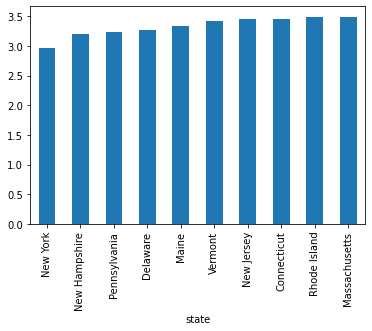

In [ ]:
real_estate_data_copy.groupby('state')['bed'].agg(np.mean).round(2).sort_values().plot(kind='bar');

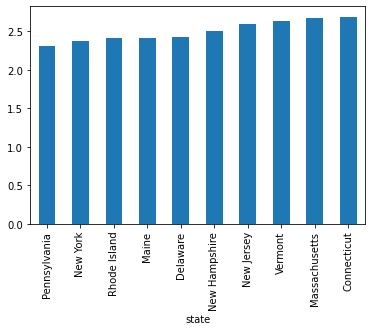

In [ ]:
real_estate_data_copy.groupby('state')['bath'].agg(np.mean).round(2).sort_values().plot(kind='bar');

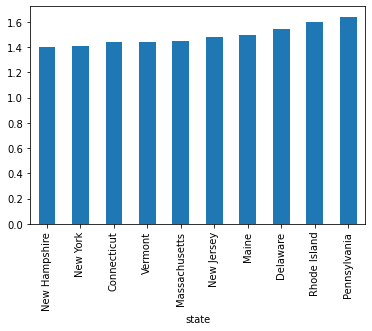

In [ ]:
real_estate_data_copy.groupby('state')['bed_bath_ratio'].agg(np.mean).round(2).sort_values().plot(kind='bar');

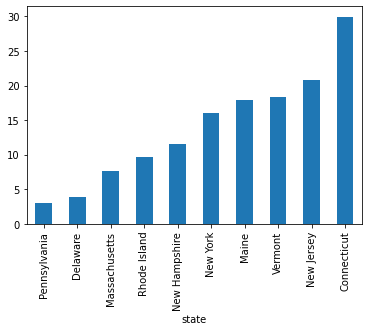

In [ ]:
real_estate_data_copy.groupby('state')['acre_lot'].agg(np.mean).round(2).sort_values().plot(kind='bar');

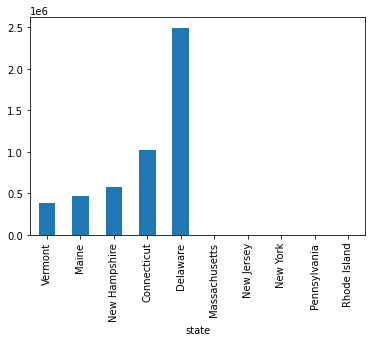

In [ ]:
real_estate_data_copy.groupby('state')['price_acre'].agg(np.mean).round(2).sort_values().plot(kind='bar');

What is best city by more than one feature?

What if our client has a budget?
*   When searching for a new home most buyers have a budget

The function below allows our client to find a city that is:
1.   Within their budget
2.   A below average price per square foot
3.   An above average amount of bedrooms and bathrooms 

In [ ]:
# States in the top ten of price per sqft, number of bedroom, number of bathrooms 
def findhome_onbudget(state, budget):
  state_data = real_estate_data_copy[real_estate_data_copy['state_abbrev'] == state]
  within_budget = state_data[state_data['price'] <= budget]
  a = within_budget.groupby('city')['price_sqft'].agg(np.mean).round(2).sort_values(ascending = True)[:100].index.tolist()
  b = within_budget.groupby('city')['bed'].agg(np.mean).round(2).sort_values(ascending = False)[:100].index.tolist()
  c = within_budget.groupby('city')['bath'].agg(np.mean).round(2).sort_values(ascending = False)[:100].index.tolist()
  common_elements = list(set.intersection(*map(set, [ a, b, c])))
  if len(common_elements) == 0:
    return 'Nothing found'
  else:
    return common_elements

findhome_onbudget('NY',700000)

['Schodack Landing',
 'Hillsdale',
 'Morrisonville',
 'White Lake',
 'Essex',
 'Milan',
 'Kinderhook',
 'Chatham Village',
 'Stormville',
 'Verbank',
 'Nassau',
 'Whitehall Village',
 'Greenwich',
 'Monticello',
 'Peru']

# regression 

In [ ]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm


x = real_estate_data_copy[['price_sqft','bed_bath_ratio']]
y = real_estate_data_copy['price']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 395699.9747873738
Coefficients: 
 [   1127.97967151 -114272.85010934]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                 6.668e+04
Date:                Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:31:11   Log-Likelihood:            -1.5332e+06
No. Observations:              108842   AIC:                         3.066e+06
Df Residuals:                  108839   BIC:                         3.066e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



# scrap

In [ ]:
state_data = real_estate_data_copy[real_estate_data_copy['state_abbrev'] == 'NJ']
state_data.groupby('city')['price'].agg(np.mean).round(2).sort_values()

city
Port Murray               9714.29
Buena Vista              50000.00
Devonshire               73500.00
Elk Township             75000.00
Berkeley Township        79900.00
                          ...    
Loch Arbour Village    1610168.00
Allenhurst             1610168.00
Deal                   1610168.00
Normandy Beach         1610168.00
Princeton Township     1610168.00
Name: price, Length: 759, dtype: float64